In [3]:
import nilearn
from nibabel.testing import data_path
from nilearn import datasets, plotting, regions
import brainspace
import pandas as pd
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import scipy.io as sio
from nilearn.image import index_img
from scipy.stats import ttest_ind
import mvlearn
InteractiveShell.ast_node_interactivity = "all"
import hcp_utils as hcp

In [4]:
dataset = datasets.fetch_atlas_schaefer_2018()
#dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels
labels = np.insert(labels, 0, 'Background')

In [7]:
from nilearn.maskers import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)

In [60]:
from nilearn.interfaces import fmriprep
from nilearn.interfaces.fmriprep import load_confounds
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlations = []

subjects = ['02', '08]

for subject in subjects:
    confounds_minimal_no_gsr, sample_mask = fmriprep.load_confounds(
    "/Users/VictoriaShevchenko/Documents/PhD/rus_depression/derivatives/sub-%s/func/sub-%s_task-rest_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz" % (subject, subject),
    strategy=["high_pass", "motion", "wm_csf", "global_signal"],
    motion="basic", wm_csf="basic", global_signal="basic")
    
    time_series = masker.fit_transform("/Users/VictoriaShevchenko/Documents/PhD/rus_depression/derivatives/sub-%s/func/sub-%s_task-rest_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz" % (subject, subject),
                                   confounds=confounds_minimal_no_gsr,
                                   sample_mask=sample_mask)
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    correlations.append(correlation_matrix)


In [61]:
mean_correlations = np.mean(correlations, axis=0)
np.fill_diagonal(mean_correlations, 0)

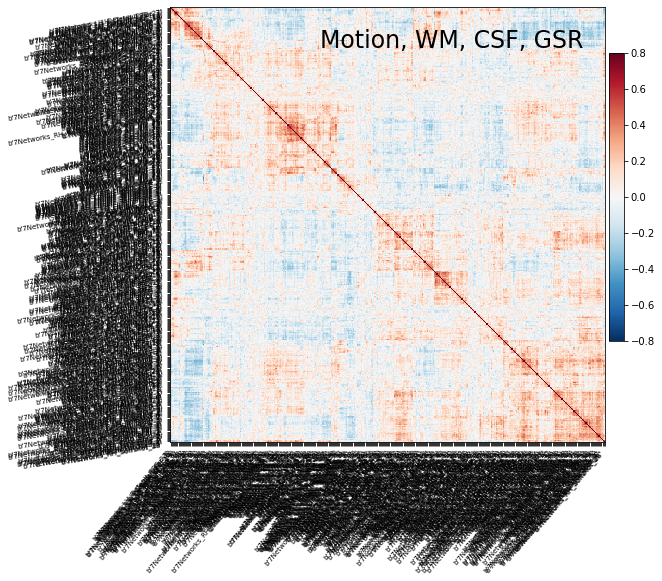

In [62]:
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, title='Motion, WM, CSF, GSR',
                     reorder=True)


In [63]:
from brainspace.gradient import GradientMaps
gm = GradientMaps(n_components=5, approach='dm', kernel='normalized_angle')


In [64]:
gm.fit(correlation_matrix)

GradientMaps(kernel='normalized_angle', n_components=5)

In [56]:
from brainspace.datasets import load_parcellation
labeling = load_parcellation('schaefer', scale=400, join=True)


In [65]:
from brainspace.utils.parcellation import map_to_labels
grad = [None] * 5
for i, g in enumerate(gm.gradients_.T):
    grad[i] = map_to_labels(g, labeling, mask=labeling != 0, fill=np.nan)

In [58]:
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres
surf_lh, surf_rh = load_conte69()
#plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(800, 200))


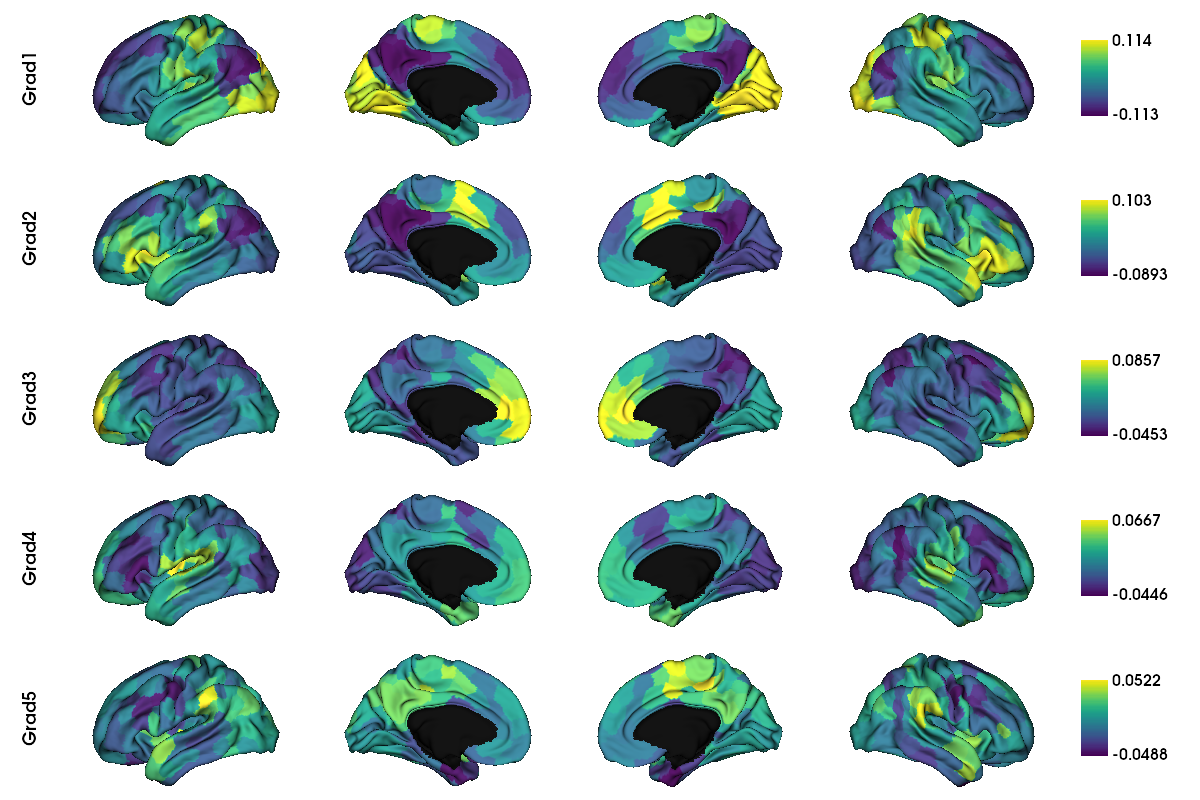

In [42]:
plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(1200, 800), cmap='viridis',
                 color_bar=True, label_text=['Grad1', 'Grad2', 'Grad3', 'Grad4', 'Grad5'], zoom=1.5, embed_nb = True)


/Users/VictoriaShevchenko/opt/anaconda3/lib/python3.8/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


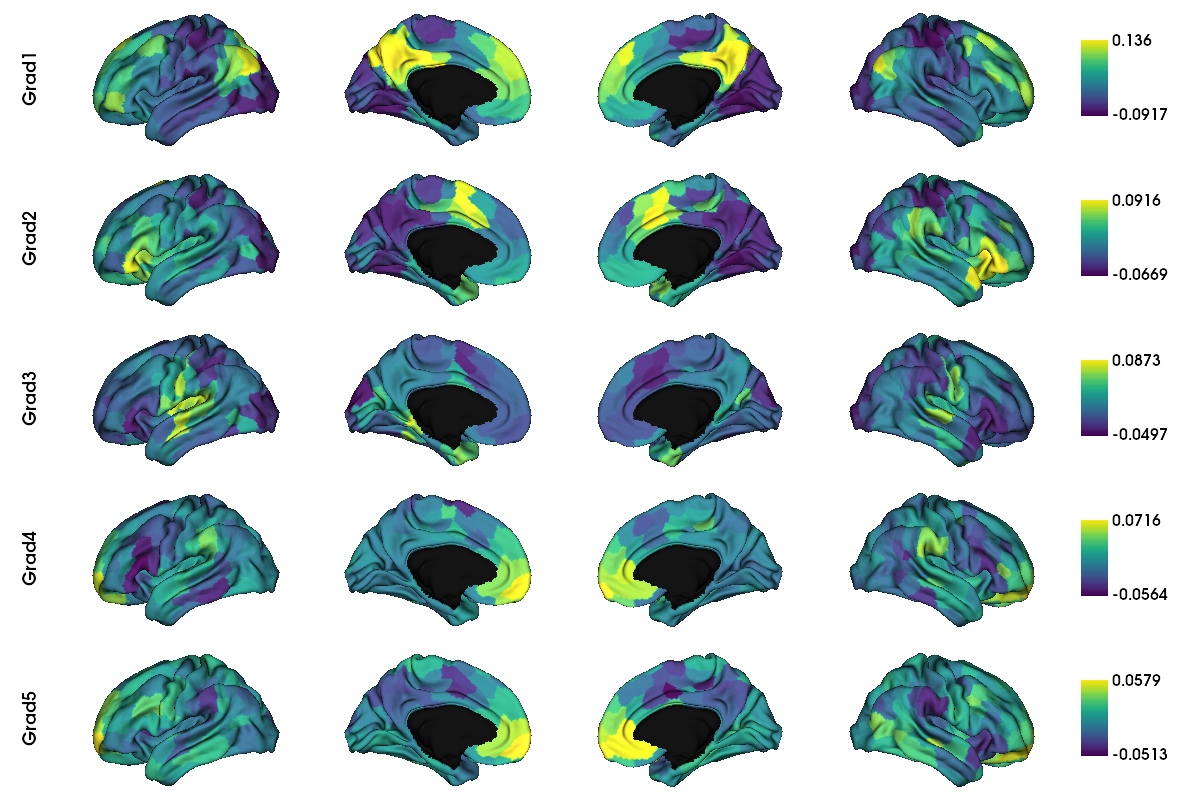

In [59]:
plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(1200, 800), cmap='viridis',
                 color_bar=True, label_text=['Grad1', 'Grad2', 'Grad3', 'Grad4', 'Grad5'], zoom=1.5, embed_nb = True)

/Users/VictoriaShevchenko/opt/anaconda3/lib/python3.8/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


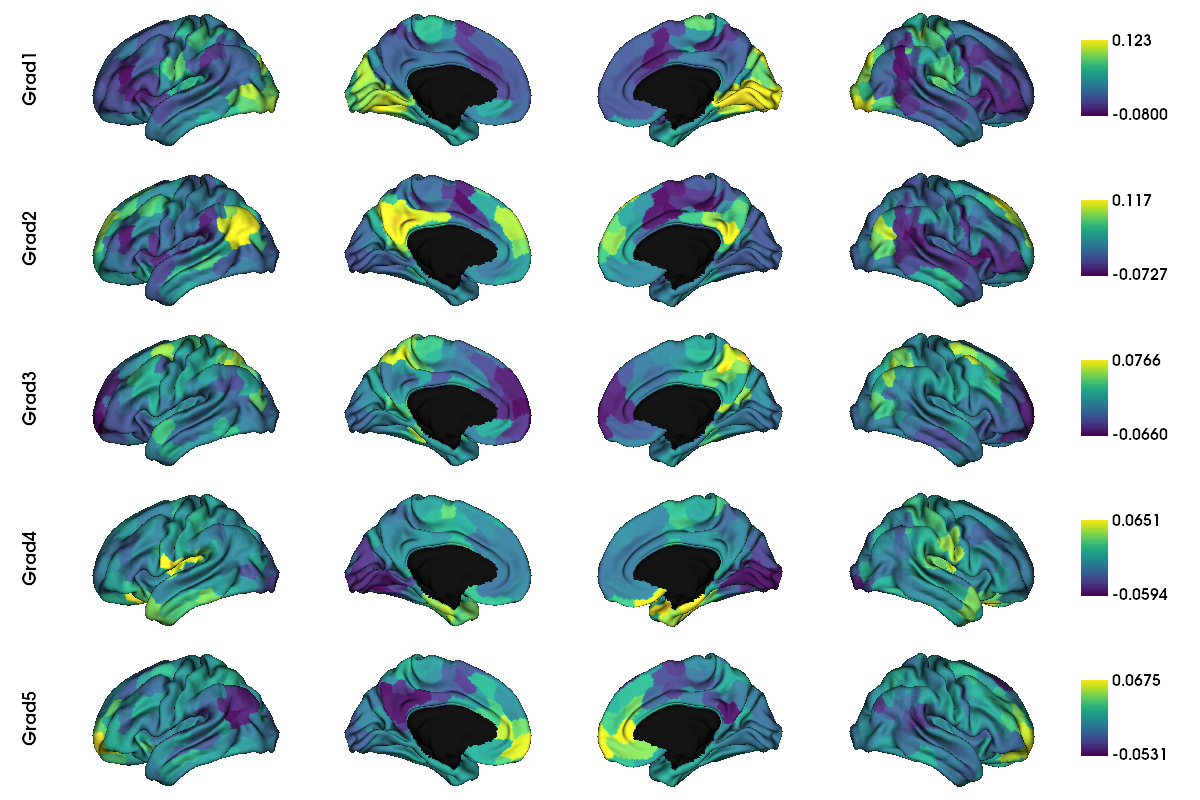

In [66]:
plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(1200, 800), cmap='viridis',
                 color_bar=True, label_text=['Grad1', 'Grad2', 'Grad3', 'Grad4', 'Grad5'], zoom=1.5, embed_nb = True)

In [ ]:
import seaborn as sns
sns.scatterplot(x = grad[1], y = grad[0])

Text(0.5, 0, 'Component Nb')

Text(0, 0.5, 'Eigenvalue')

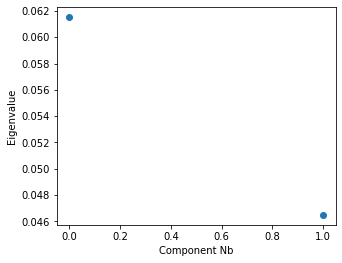

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(5, 4))
ax.scatter(range(gm.lambdas_.size), gm.lambdas_)
ax.set_xlabel('Component Nb')
ax.set_ylabel('Eigenvalue')

plt.show()